# Part II - (Prosper Loan Dataset)
## by (CHIBUIKE HENRY AZUBUIKE)


## Investigation Overview

>  For this project, I explored the prosper loan data in order to get more clarity on major reason(s) why people take loan, their categories or states, and major contributing factors that facilitate loans.


## Dataset Overview

> The project was a loan dataset from ProsperLoans, and it consisted of 113,937 observations and 81 variables describing each observation, most of which existed as float data types and a bit of object and integer data types. some of these variables included occupation, debt to income ratio, original loan amount, borrower state, employment status, stated monthly income, credit scores of the borrowers, amongst many others.

> I had certian features I wanted to explore, getting clarity on major reason(s) why people take loan, their categories or states, and major contributing factors that facilitate loans, so I had to drop off some columns that I thought were not of help to my investigation, then I took the average of the upper and lower credit scores and appended it to the new data frame in order to make analysis of the credit scores abit easier.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

loan = pd.read_csv('prosperLoanData.csv')
loan['AvgCreditScore'] = (loan['CreditScoreRangeLower'] + loan['CreditScoreRangeUpper'])/2
loan1 = loan[['ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'AvgCreditScore']]

# Subset the entire dataset and produce a dataset having just reason1 (debt consolidation) in the 'ListingCategory (numeric)' column section.
reason1 = loan1[loan1['ListingCategory (numeric)'] == 1]

# Creating a dataframe for debt consolidation count
DebtConsolidation = pd.DataFrame(reason1['BorrowerState'].value_counts())
DebtConsolidation = DebtConsolidation.rename_axis('states').reset_index()
DebtConsolidation.rename(columns={'BorrowerState':'DebtConsolidationCount'}, inplace=True)

# Creating a dataframe for original borrower state count
Original = pd.DataFrame(loan['BorrowerState'].value_counts())
Original = Original.rename_axis('states').reset_index()
Original.rename(columns={'BorrowerState':'OriginalCount'}, inplace=True)

# Merging the both dataframes and appending a new column (a ratio of the both counts)
RatioData = DebtConsolidation.merge(Original, on = 'states' )
RatioData['Ratio'] = (RatioData['DebtConsolidationCount'])/(RatioData['OriginalCount'])

# Checking for the state with the highest ratio
RatioData[RatioData['Ratio']==RatioData['Ratio'].max()]

# Creating a dataframe of sorted average credit scores for the states
states =loan.groupby('BorrowerState')['AvgCreditScore'].mean().sort_values()
CreditScores = pd.DataFrame(states)
CreditScores = CreditScores.rename_axis('states').reset_index()

# Creating a dataframe of sorted debt consolidation ratio for the states
RatioData = RatioData.sort_values('Ratio', ascending=False)

# Merging both dataframes
CommonStates = CreditScores.merge(RatioData, on = ['states'])



## (Visualization 1)

> The listing category consists of numbers (1-20) representing various reasons why people take out loans; this wss actually a major point of interest for me.

> The bar plot revealed a unimodal plot, a massive peak value count was observed, indicating that the number '1' (which represented 'Debt Consolidation') on the listing category, was the most reason why people took out loan, owning a very huge count of about 58,000 amongst others.

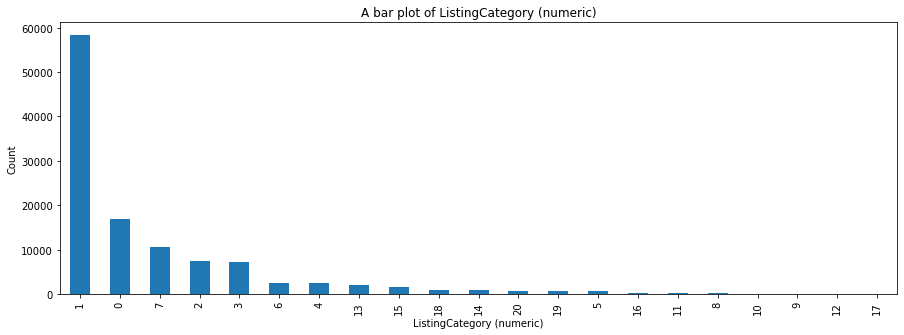

In [3]:
# A bar plot of 'ListingCategory (numeric)' variable

plt.figure(figsize=[15, 5])
loan['ListingCategory (numeric)'].value_counts().plot(kind='bar')
plt.title('A bar plot of ListingCategory (numeric)')
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('Count')
plt.show();

## (Visualization 2)

> After subsetting the entire dataset to produce a dataset having just reason1 (debt consolidation) in the 'ListingCategory (numeric)' column section, the plot above reveals Califonia (CA) as the state with the highest number of counts in the 'BorrowerState' category, but this massive count could as well be due to the fact that Califonia is highly populated.

> This was further explored.

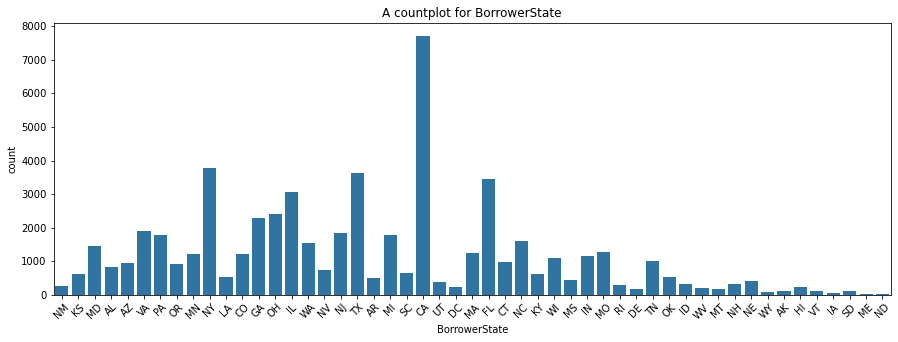

In [4]:
# Next is exploring the 'BorrowerState' category in this new dataset

# A countplot for 'BorrowerState' 

plt.figure(figsize=[15, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = reason1, x = 'BorrowerState', color = default_color)
plt.xticks(rotation =45)
plt.title('A countplot for BorrowerState')
plt.show()

## (Visualization 3)

> The state with the highest debt consolidation ratio is South Dakota (SD) with 68%, while the state with the least ratio is Iowa (IA) with 24%.

> This implies that during this period, 68% of persons from South Dakota took out loan for the purpose of Debt Consolidation, while in Iowa, the percentage of persons that took out loan for the purpose of debt consolidation was recorded to be 24%, which was the least amongst the other states.

> This revealed that Califonia didn't have the highest percent of debt consolidation applications amongst the other states, and that most of it's count were actually due to it's population

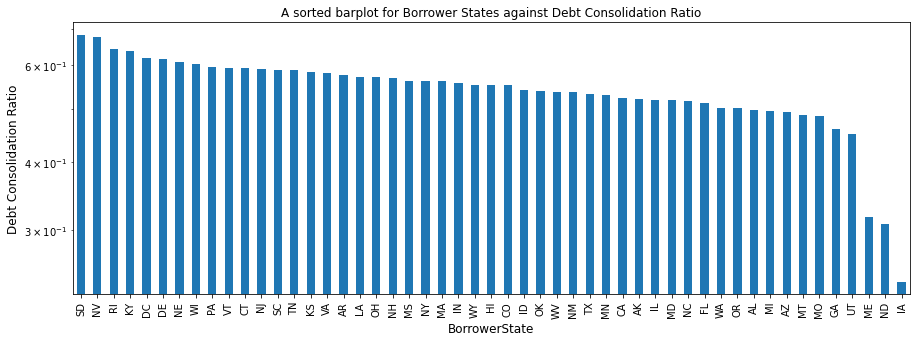

In [5]:
# A barplot for 'BorrowerState' against 'Debt Consolidation Ratio'

plt.figure (figsize=(15,5))
RatioData.groupby('states')['Ratio'].mean().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('BorrowerState', fontsize=12)
plt.ylabel ('Debt Consolidation Ratio', fontsize=12)
plt.yscale('log')
plt.title('A sorted barplot for Borrower States against Debt Consolidation Ratio')
plt.show()

## (Visualization 4)

> The bar plot above clearly reveals states with the highest and lowest average credit scores. It shows Delaware (DE) as the state with the highest average credit scores, and Nothh Dakota (ND) as the state with the least average credit scores.

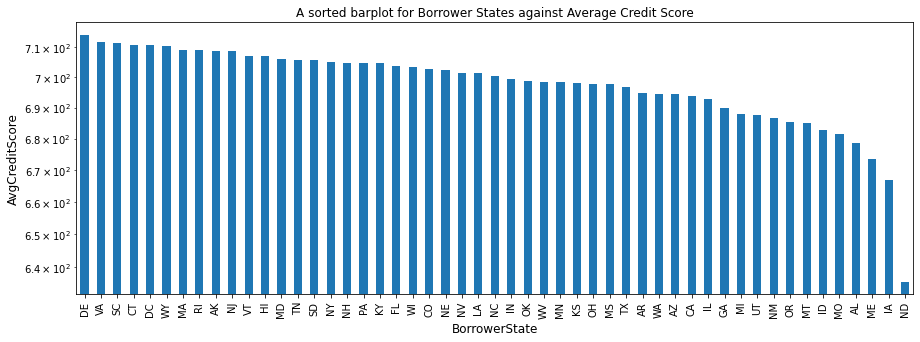

In [6]:
# A barplot for 'BorrowerState' against 'AvgCreditScore'

plt.figure (figsize=(15,5))
loan.groupby('BorrowerState')['AvgCreditScore'].mean().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('BorrowerState', fontsize=12)
plt.ylabel ('AvgCreditScore', fontsize=12)
plt.yscale('log')
plt.title('A sorted barplot for Borrower States against Average Credit Score')
plt.show()

## (Visualization 5)

> The scatterplot below reveals that there appears to be some what of a direct relationship (with a strong correlation of about 80%) between the "Debt consolidation ratio" and "Average credit scores", which might be an indication that for the 'Borrower states', an increase in "Debt consolidation ratio" gives rise to an increase in "Average credit scores"¶

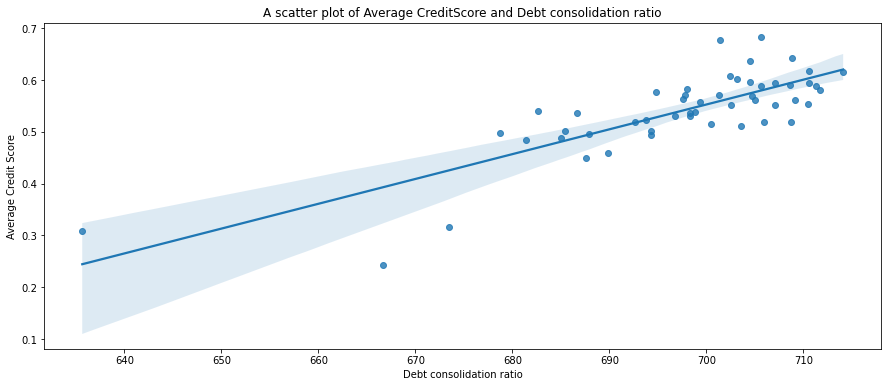

In [7]:
# A scatter plot of Average CreditScore and Debt consolidation ratio

plt.figure(figsize=[15, 6])
ax = sb.regplot(x="AvgCreditScore", y="Ratio", data=CommonStates)
plt.title('A scatter plot of Average CreditScore and Debt consolidation ratio')
plt.xlabel ('Debt consolidation ratio')
plt.ylabel ('Average Credit Score')
plt.show()

## (Visualization 6)

> The plot below reveals a relationship between average credit score, income range and employment status. It goes on to reveal that those earning within the income range of 100K USD and above tend to have the highest average credit score, with the retired and 'not employed' topping that income range category.



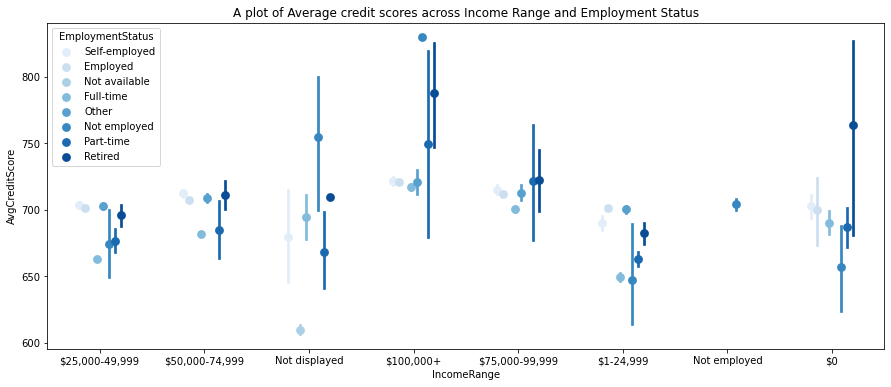

In [8]:
# A plot of Average credit scores across Income Range and Employment Status

fig = plt.figure(figsize = [15,6])
ax = sb.pointplot(data = loan1, x = 'IncomeRange', y = 'AvgCreditScore', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('A plot of Average credit scores across Income Range and Employment Status')
ax.set_yticklabels([],minor = True)
plt.show();

## (Visualization 7)

> Interestingly, the clustered plot below also reveals that those earning within the income range of 100K USD and above tend to have the least (and most favorable) 'debt to income ratio'.

> A closer look, on average, further reveals that the retired persons in each employment category tend to have the least (and most favorable) 'debt to income ratio'.

> This goes to infer that the retired persons are more likely to get loans due to the fact that they usually tend to have a favorable 'debt to income ratio' and high credit scores.

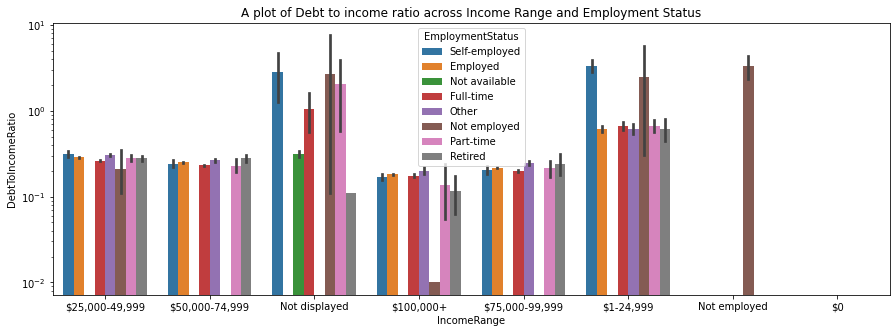

In [9]:
# A plot of Debt to income ratio across Income Range and Employment Status

plt.figure(figsize = [15, 5])

sb.barplot(data = loan1, x = 'IncomeRange', hue = 'EmploymentStatus', y= 'DebtToIncomeRatio')
plt.title('A plot of Debt to income ratio across Income Range and Employment Status')
plt.yscale('log')
plt.show()

In [10]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 743424 bytes to Part_II_slide_deck_template.slides.html
